# Projet MAD 
DE SOUSA Emilio & LAZZALI Samir

### Sommaire
- I - INTRODUCTION
- II - DESCRIPTION
 - Inportation et forme du DataSet 
 - Nettoyage des données
- III - STATISTIQUE DESCRIPTIVE UNIDIMENSIONNEL
  - Rating  
  - Category
  - Reviews  
  - Size
  - Installs
  - Type
  - Type (gratuit payant)
  - Price
  - Content Rating
  - Etude de Genres
- IV - STATISTIQUE DESCRIPTIVE BIDIMENSIONNEL (Par rapport au Rating)
  - Category
  - Reviews
  - Size
  - Installs
  - Price
  - Content Rating
  - Genres
  - Last Update
- V - STATISTIQUE DESCRIPTIVE MULTIDIMENSIONNELLE
  - MATRICE DE CORRELATION 
  - ANALYSE EN COMPOSANTE PRINCIPALES (ACP)	
- VIII - CONCLUSION






# INTRODUCTION
#### Dans le cadre du projet d’analyse de données, nous avons choisi d’étudier les applications disponibles dans le googleplay store, une plateforme de téléchargement d’applications pour Android. Concernant ces applications, nous avons toutes les informations accessibles publiquement,  que ce soit le nombre de téléchargement, la date de parution, ou encore la note.
#### Seule 2 variables étaient exploitables à l’origine. Ceci était dû aux formats des autres variables qui étaient considérées comme des chaînes de caractères. C’est pourquoi nous avons du effectuer un nettoyage de données assez lourd pour voir quelles données étaient finalement exploitables. Ainsi, par exemple, nous avons transformer le champs « Installs » qui était constitué de valeurs du type : « 50k », « 1M » en « 50 000 » et  « 1 000 000 ».
#### A notre disposition, 10 841 observations avec 13 variables. Dans ce rapport, nous allons présenter les différentes analyses que nous avons effectuées, les observations qui en découlent. Pour cela nous avons d’abord étudié les variables unes à unes, puis deux à deux, les corrélations entre les elles  pour ensuite nous concentrer sur l'analyses en composante principale.


In [2]:
# importation des librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy.special import boxcox1p

# DESCRIPTION

## Importation et forme du DataSet

In [3]:
data = pd.read_csv("googleplaystore.csv")
dataType = data.dtypes
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### On calcule le pourcentage de valeur null en fonction des variables

In [4]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)


,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


## Nettoyage des données 


In [5]:

data.dropna(how ='any', inplace = True)
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [6]:
#forme actuelle :
print(data.shape)


(9360, 13)


# STATISTIQUE DESCRIPTIVE UNIDIMENSIONNEL

## Rating

In [7]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution des notes')

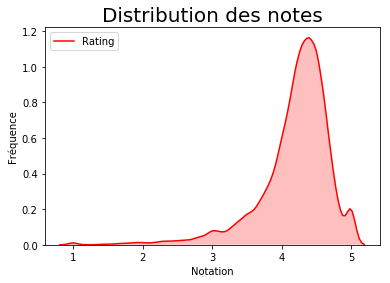

In [8]:
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Notation")
g.set_ylabel("Fréquence")
plt.title('Distribution des notes',size = 20)
#plt.savefig('rating_freq.png')

## Category

In [9]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, "Nombre d'application pour chaque catégorie")

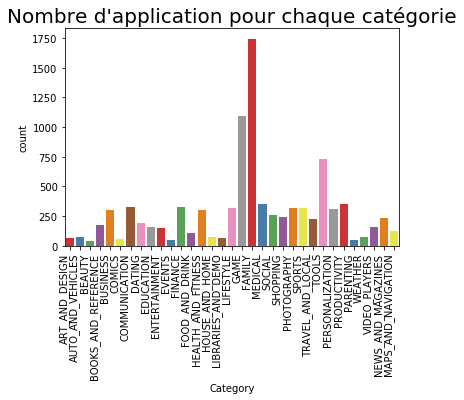

In [10]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Nombre d\'application pour chaque catégorie' ,size = 20)
#plt.savefig('count_cat.png',bbox_inches='tight')

#### Les catégories Jeu et Famille sont les plus populaires pour les applications.

## Reviews

In [11]:
data['Reviews'].head()


0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

#### Les données sont encore dans le type d'objet, nous avons besoin de convertir les en int

In [12]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution des Reveiw')

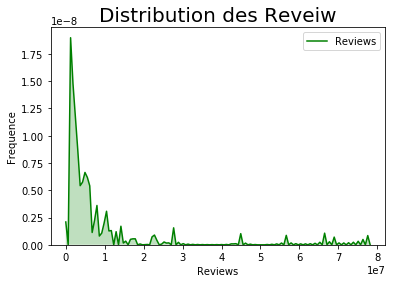

In [13]:
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequence")
plt.title('Distribution des Reveiw',size = 20)

#### La plupart des applications ont moins d'un million d'évaluations. Évidemment, les applications bien connues ont beaucoup d'évaluations

## Size 

In [14]:
data['Size'].unique()[:30]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M'], dtype=object)

#### Les données sont toujours dans du type objet et contiennent l'unité, il y aussi et des **Varies with device** à supprimer

In [15]:
len(data[data.Size == 'Varies with device'])


1637

#### **Nettoyage des donées** : On les convertis d'abord en NA.
On supprime les unité **k** ou **M** 

In [16]:
data['Size'].replace('Varies with device', np.nan, inplace = True )


# Et la pourquoi tu fillna(1) pour remplacer les na et apres tu veux remplacer les na par mean ???


In [17]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# La tu affecte la mean à tes NA mais tu les a replacé par 1 en haut 

In [18]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

Text(0.5, 1.0, 'Distribution des tailles')

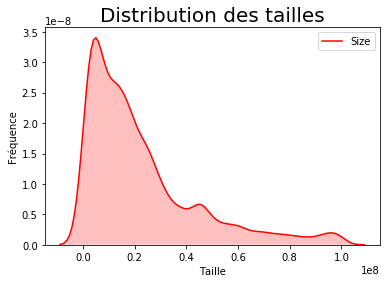

In [19]:
g = sns.kdeplot(data.Size, color="Red", shade = True)
g.set_xlabel("Taille")
g.set_ylabel("Fréquence")
plt.title('Distribution des tailles',size = 20)

## Installs

In [20]:
data['Installs'].unique()[:10]


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+'],
      dtype=object)

#### Les données sont toujours dans le type d'objet et contiennent le signe +.
**Nettoyage des donées**, on les transforme  
- 0 = 1+
- 1 = 5+
- 2 = 10+
- etc

In [21]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))
data['Installs'].unique()



array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [22]:
Sorted_value = sorted(list(data['Installs'].unique()))
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

# J'ai pas compris cette ligne au dessus : data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True ) ???



Text(0.5, 1.0, 'Distribution des installations')

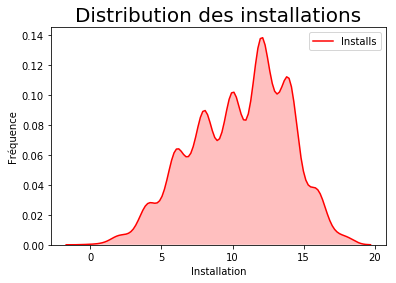

In [23]:
g = sns.kdeplot(data.Installs, color="Red", shade = True)
g.set_xlabel("Installation")
g.set_ylabel("Fréquence")
plt.title('Distribution des installations',size = 20)

##  Type (gratuit payant)

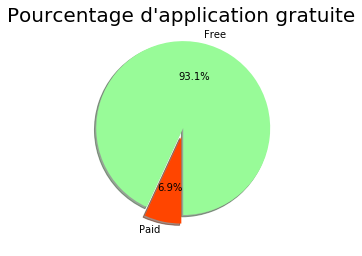

In [24]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Pourcentage d\'application gratuite',size = 20)
plt.show()

#### La plupart des applications sont gratuites (93,1%).

## Price

In [25]:
data.Price.unique()[:30]

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95'], dtype=object)

#### **Nettoyage des donées**, on supprime le $ des prix avant de les convertir en float

In [26]:

data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))


In [27]:
data['Price'].describe()


count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Le prix moyen est d'environ 0,96, mais la plupart sont gratuits (8715/9360).


In [28]:
print( 'L\'application la plus chère est à 400 dollars : ')
data[data['Price'] == 400]['App']


L'application la plus chère est à 400 dollars : 


4367    I'm Rich - Trump Edition
Name: App, dtype: object

Text(0.5, 1.0, 'Distribution du prix')

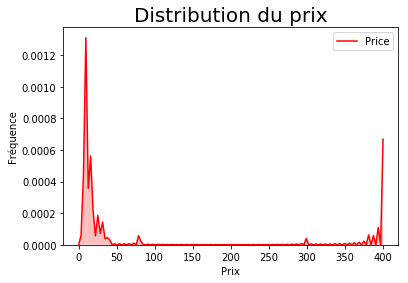

In [29]:
g = sns.kdeplot(data.Price, color="Red", shade = True)
g.set_xlabel("Prix")
g.set_ylabel("Fréquence")
plt.title('Distribution du prix',size = 20)

#### Transformation du Type pour Free (0 ou 1) pour la suite de l'analyse

In [38]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

## Content Rating

In [30]:
data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [31]:
# Comme il n'y a qu'une line avec
# un ContenRating : Unrated on le supprime du dataset 
data = data[data['Content Rating'] != 'Unrated']

#### Nous reviendrons sur cette variable lors de l'analyse 2D

## Etude de Genres

In [32]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

#### Les genres sont varier car ils sont parfois ratacher a un sous genre : `Arcade;Action & Adventure`

**Nettoyage des données**

#### On va donc ne conserver que le premier Genres et les grouper pour connaitre la répartition dans les Genres principaux. On va aussi fusionner `Group Music & Audio  et  Music`
#### il en reste 47 contre les 115 du debut.

In [33]:
data['Genres'] = data['Genres'].str.split(';').str[0]
data['Genres'].replace('Music & Audio', 'Music',inplace = True)
print( len(data['Genres'].unique()) , "genres")

47 genres


Get Dummies pour la suite de l'annalyse

In [34]:
#data = pd.get_dummies(data, columns= ["Content Rating"])

## Etude de LastUpdated

#### Last Update est toujours au format String, nous avons besoin de la transformer la tracer

In [49]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

#### On a décidé de le changer au format "datetime" mais il ne peut toujours pas être utilisé en sous ce format

In [50]:
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

#### Nous avons créé une nouvelle feature "lastupdate".
#### Elle contiendra depuis combien de temps cette application a été mise à jour la dernière fois (... il y a quelques jours).  Le tout indexé sur l'application la plus à jour : '2018-08-08 00:00:00'
2018-08-08 00:00:00 est la date la plus à jour, lastupdate aura donc la valeur de la difference avec cette date 

In [58]:
data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days
data['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

# STATISTIQUE DESCRIPTIVE BIDIMENSIONNEL (par rapport au Rating)

## Rating / Category

Text(0.5, 1.0, 'Boîte à moustaches Rating / Category')

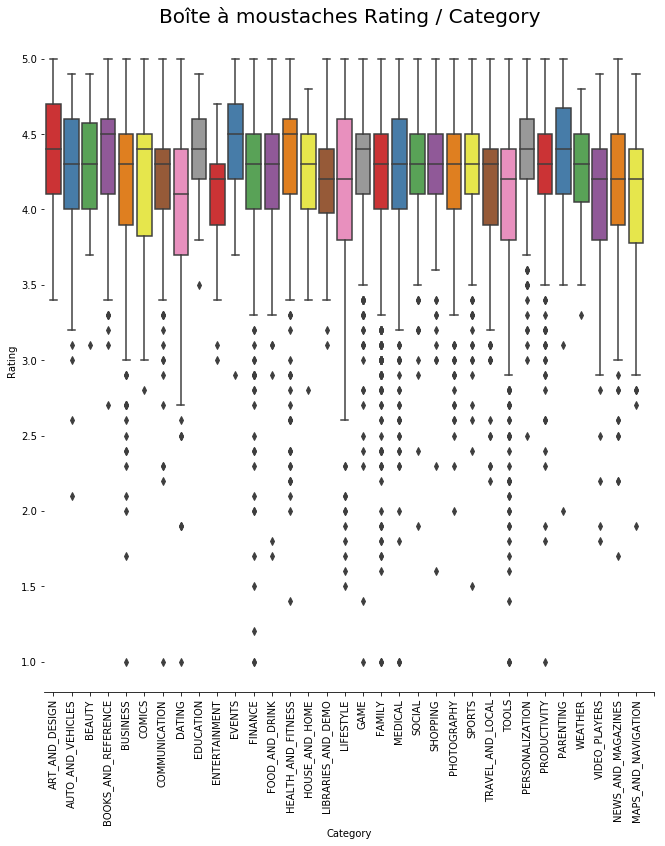

In [33]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boîte à moustaches Rating / Category',size = 20)

#### Le Rating ne different pas beaucoup pour chaque catégory

## Rating / Reviews

<Figure size 720x720 with 0 Axes>

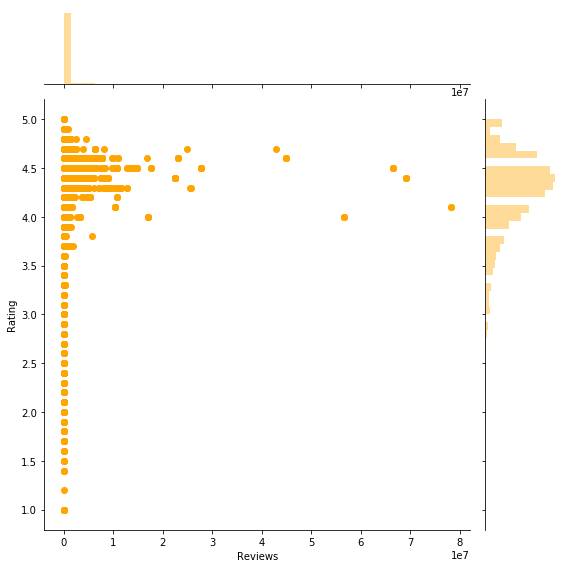

In [34]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,height = 8);


Text(0.5, 1.0, 'Rating VS Reveiws')

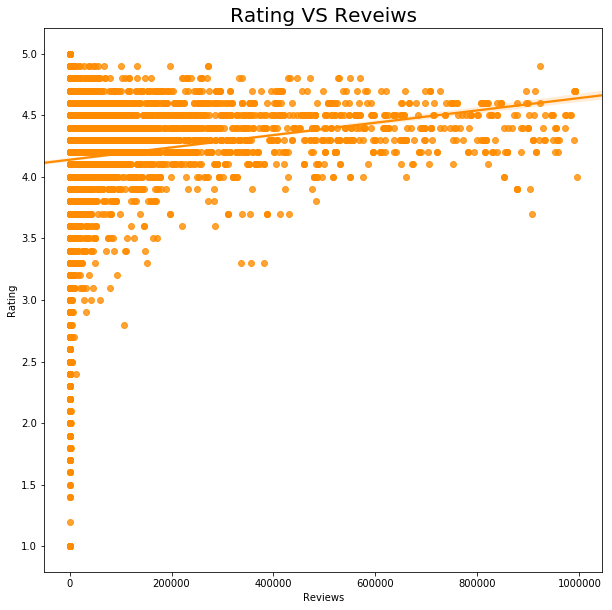

In [35]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

#### Il semble que les applications bien connues obtiennent une bonne note

## Rating / Size

<Figure size 720x720 with 0 Axes>

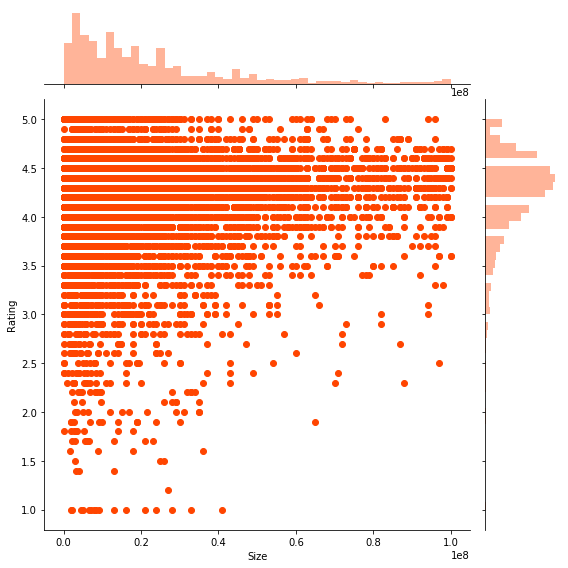

In [36]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, height = 8);

#### Un commentaire ? 

## Rating / Installs

Text(0.5, 1.0, 'Rating VS Installs')

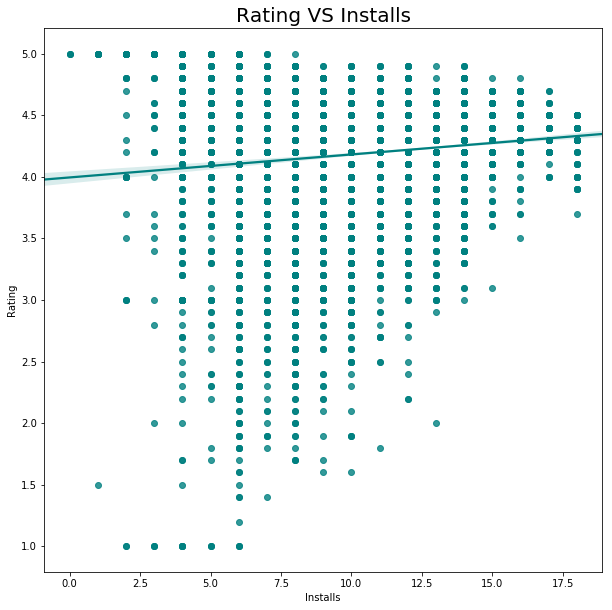

In [37]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

#### Il semblerait que le nombre d'installation affecte le Rating

## Rating / Price

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

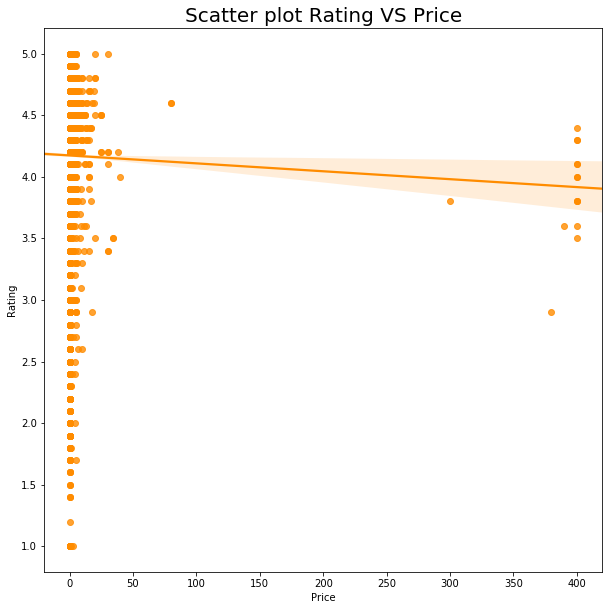

In [38]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

#### Les applications d'un prix plus élevé semble plus décevoir le client. 
#### Pour la suite nous allons créer des fourchettes de prix : 
0  : '0 Gratuit'
0.01 <= 0.99: '1 bas de gamme'
0.99 <= 2.99 : '2 abordables'
2.99 <= 4.99): '3 normale'
4.99 <= 14.99): '4 cher'
14.99 <= 29.99): '5 tres cher'
supérieure à 29.99) : '6 trop cher'

In [39]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Gratuit'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 bas de gamme'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 abordable'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normale'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 cher'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 tres cher'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 trop cher'
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Gratuit,4.186298
1,1 bas de gamme,4.300943
2,2 abordable,4.292975
3,3 normale,4.250318
4,4 cher,4.269149
5,5 tres cher,4.252000
6,6 trop cher,3.923810


#### Les applications bas de gamme entre 0.01 et 0,99 dollars ont les meilleurs notes

Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

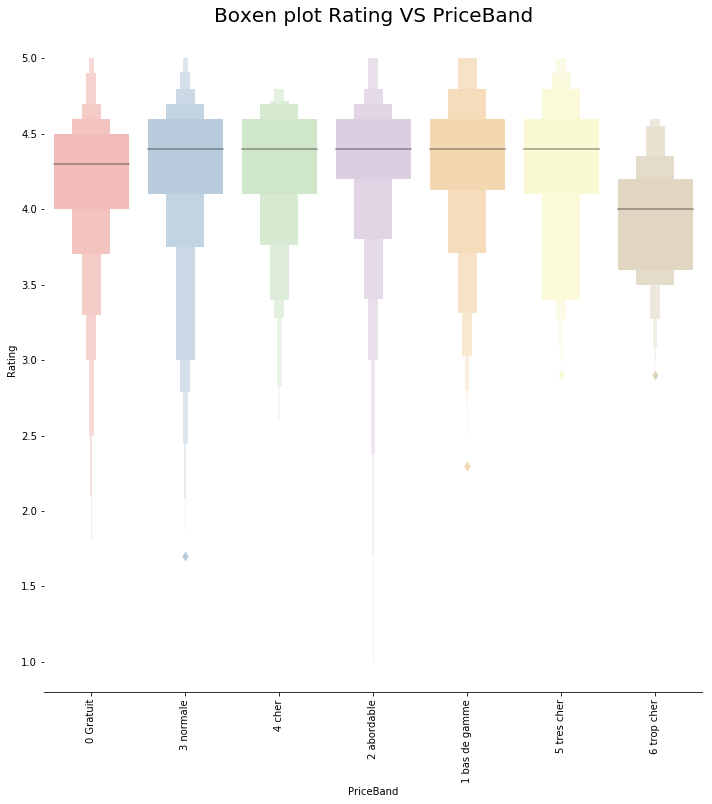

In [40]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

#### Les prix n'ont pas d'effet sur le Rating , mais pour les applications trop cher le Rating peut etre plus mauvais


## Rating / Content Rating

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

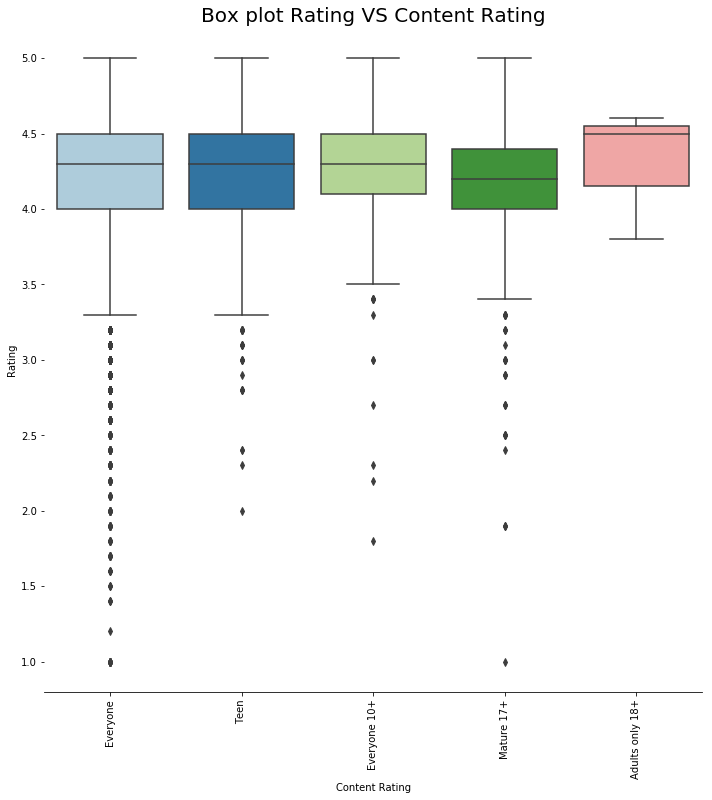

In [41]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

#### Le classement du contenu n'a pas trop d'effet sur le Rating, mais dans les applications 'Matures', ils ont l'air d'être moins bien notés que les autres.

## Rating / Genres

In [43]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [44]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)


,Genres,Rating
14,Dating,3.970769


In [45]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)


,Genres,Rating
18,Events,4.435556


#### Si l'on observe à partir de l'écart-type, le genre n'a pas trop d'effet sur la notation. La plus faible d'une note moyenne sur les genres (Rencontres) est de 3,97 alors que le plus élevé (Evénements) est de 4,43

## Rating / Last Update

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

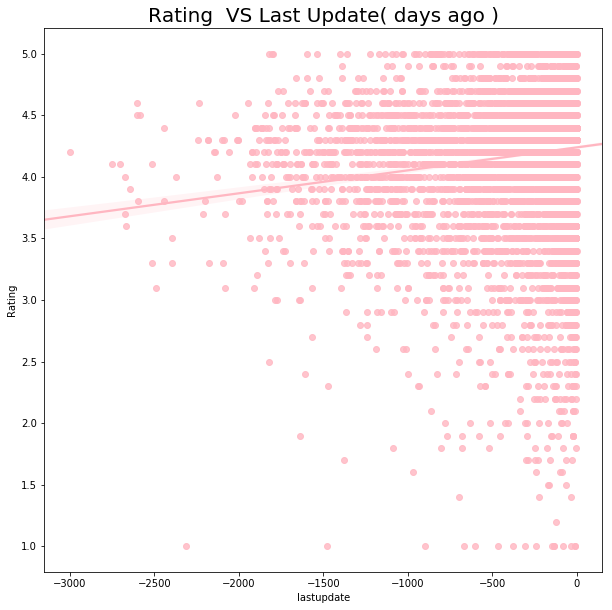

In [59]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightpink',data=data );
plt.title('Rating  VS Last Update( days ago )',size = 20)

Multidimentional 

In [48]:
dataMat = data.drop(['App','Category','Genres', 'Last Updated','Price','Current Ver','Android Ver'],axis=1)
dataMat.head()

,Rating,Reviews,Size,Installs,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Free
0,4.1,159,19000000.0,8,0,1,0,0,0,1
1,3.9,967,14000000.0,11,0,1,0,0,0,1
2,4.7,87510,8700000.0,13,0,1,0,0,0,1
3,4.5,215644,25000000.0,15,0,0,0,0,1,1
4,4.3,967,2800000.0,10,0,1,0,0,0,1


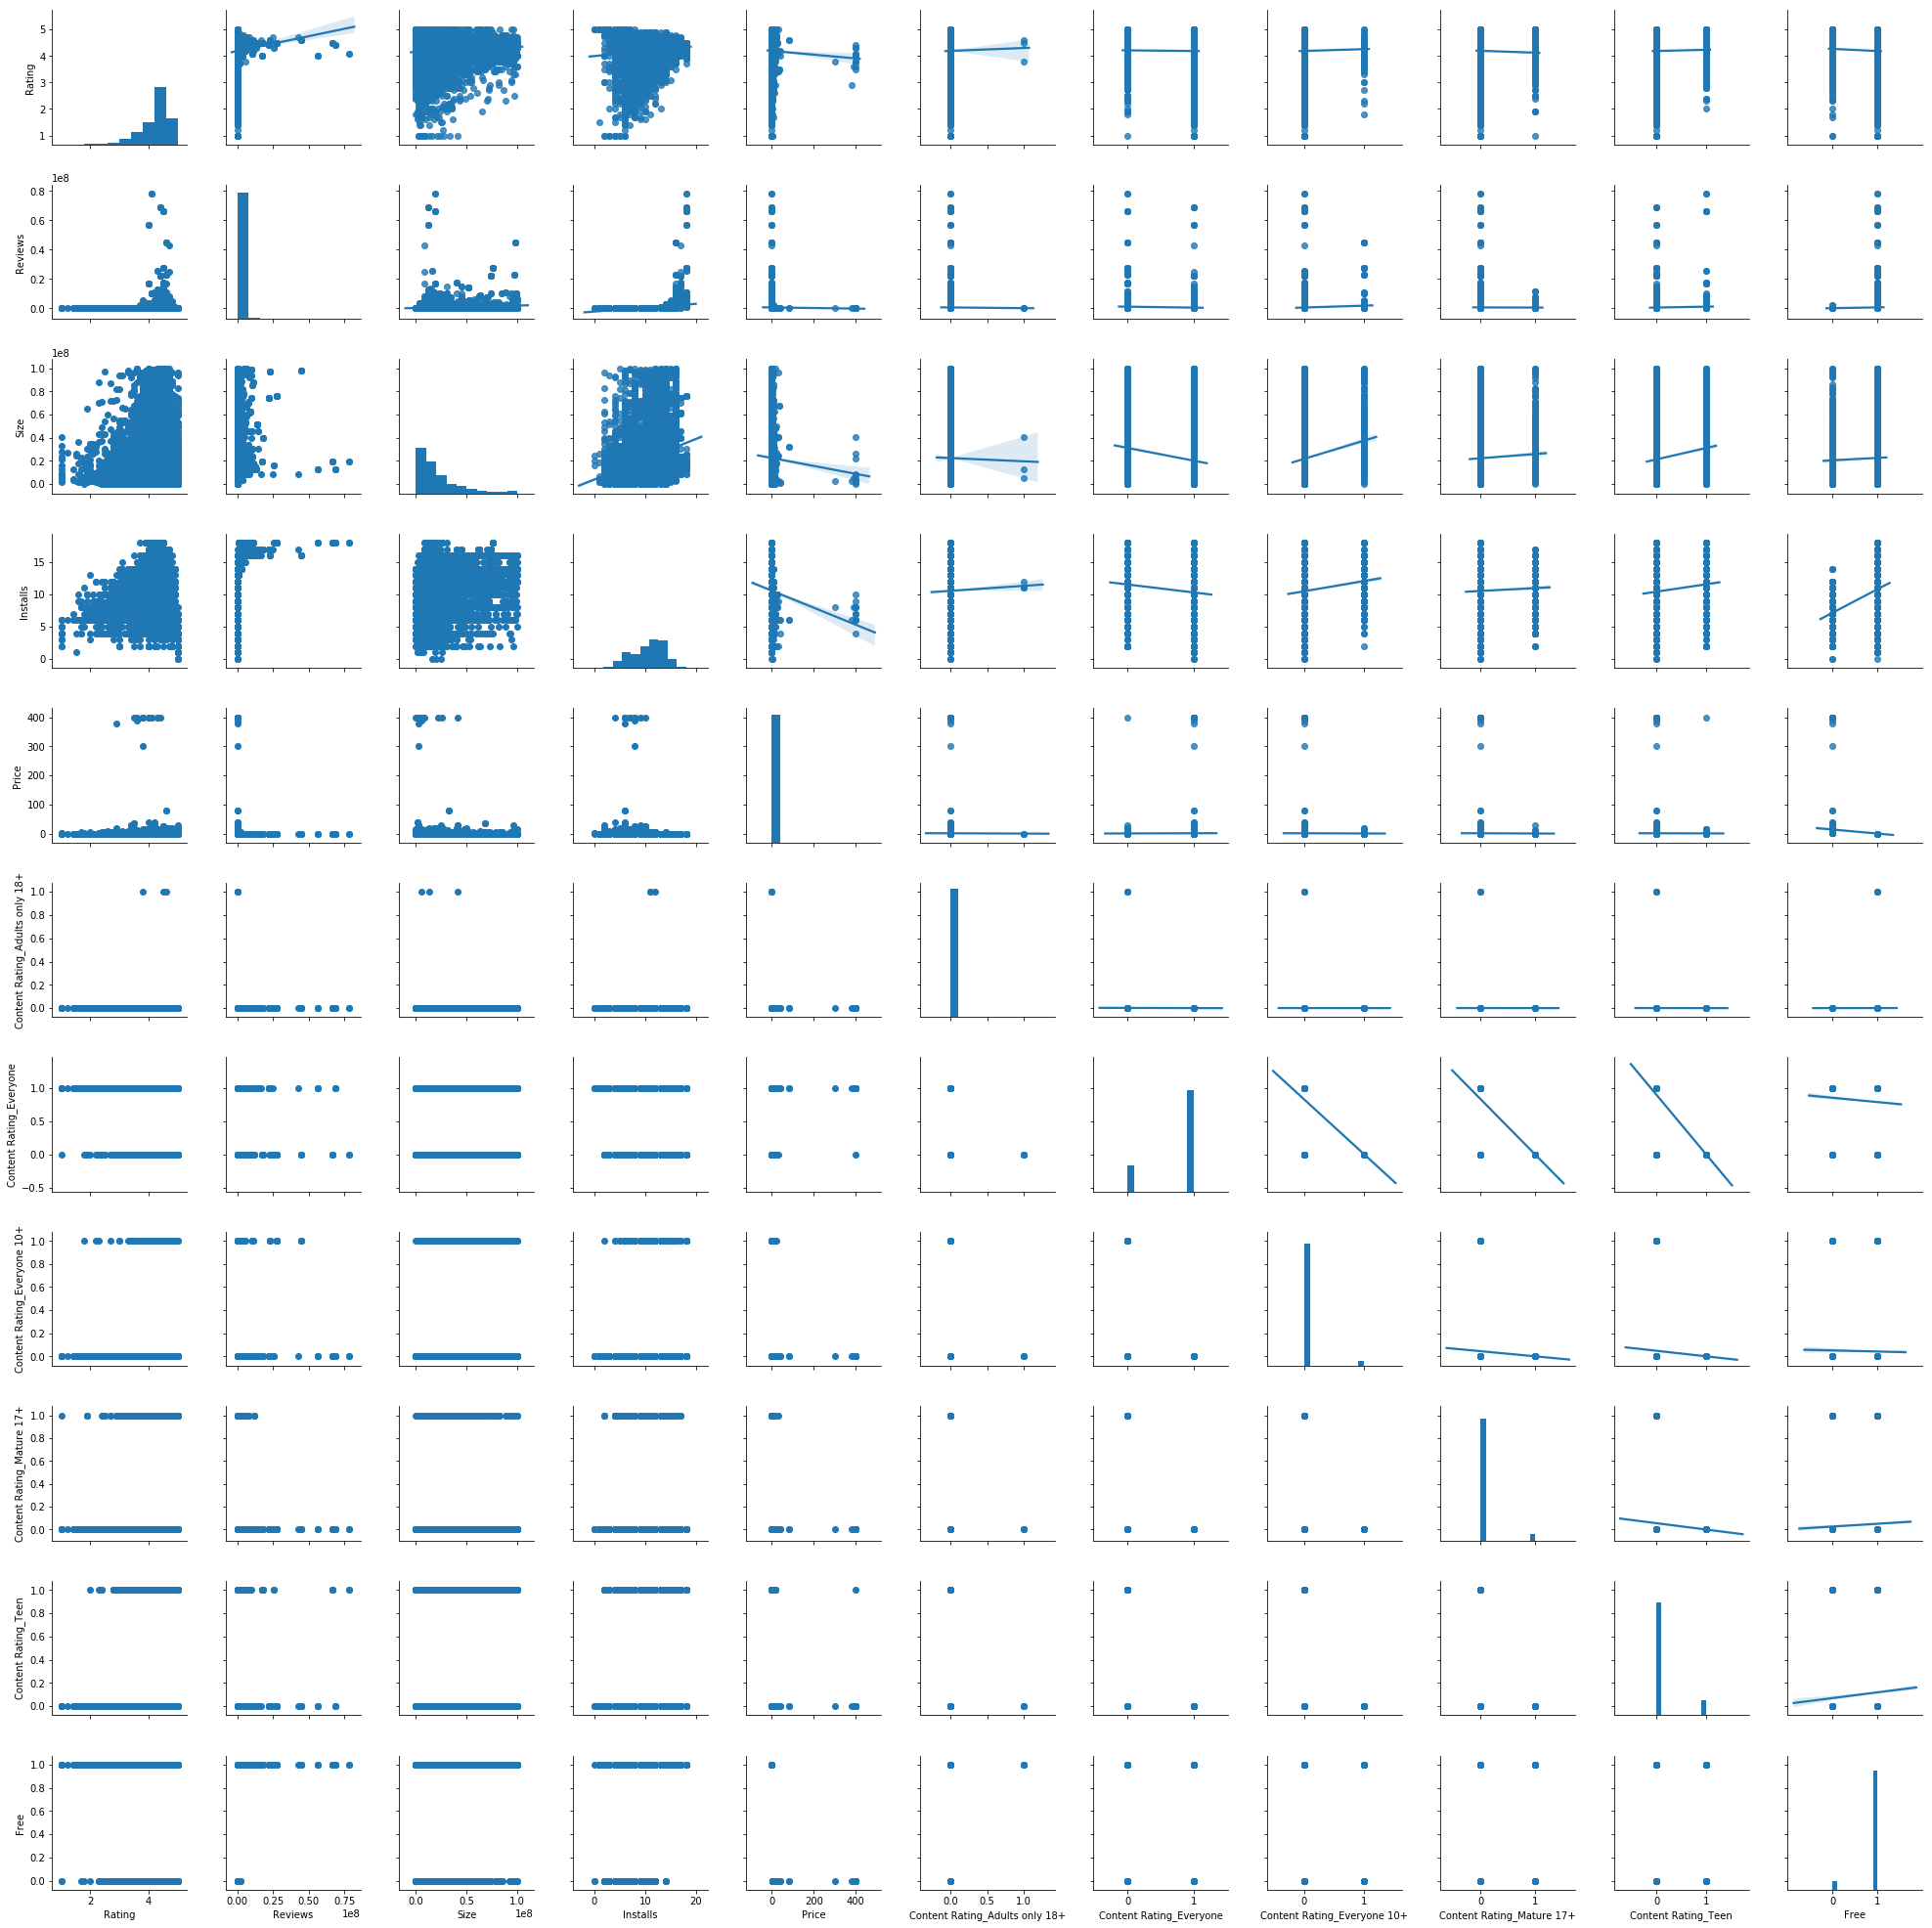

In [46]:
g = sns.PairGrid(dataMat)
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()

## MATRICE DE CORRELATION 

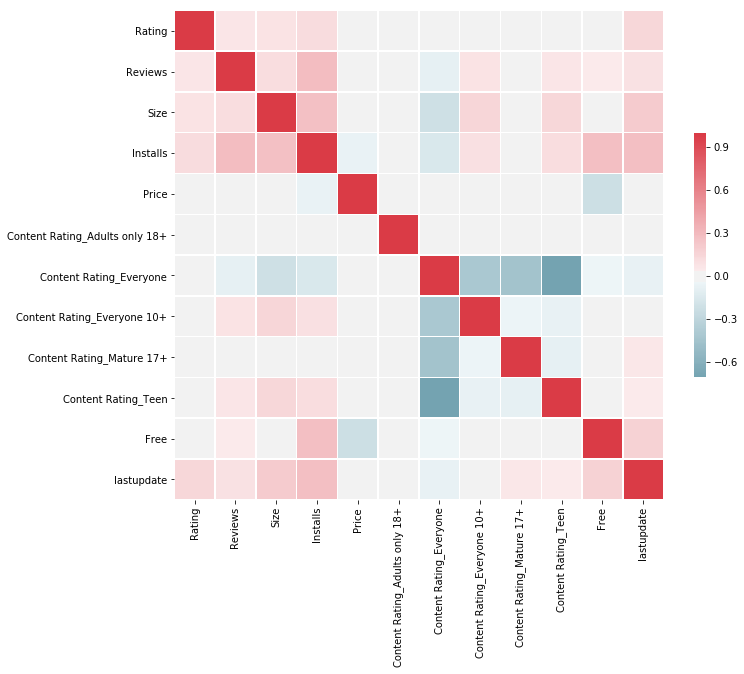

In [61]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})